In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

codes = "ex_cpu/","texture/","target temperature"
double_codes = "ex_cpu_double/","texture_double/"
nstep=10000
equilibrium = "raggiungimento_eq/"
phases = "solid/","liquid/","gas/"
files = ["output_ekin"+str(nstep)+".dat","output_epot"+str(nstep)+".dat",
"output_temp"+str(nstep)+".dat","output_etot"+str(nstep)+".dat",
"output_press"+str(nstep)+".dat"]
temperature = 0.8,1.1,1.2
properties = "kinetic energy","potential energy","temperature","total energy","pressure","target temperature"
title = "solid equilibration","liquid equilibration","gas equilibration"
color = "blue","red","orange","green","black"

print("cpu code, floating point precision")

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

for j in range(3):
    for i in range(5):
        val = np.loadtxt(codes[0]+equilibrium+phases[j]+files[i],usecols=(0),delimiter=' ',unpack='true')
        if (i == 4):
            axs[j].plot(val,color=color[i],alpha=0.7)
        else:
            axs[j].plot(val,color=color[i])
        axs[j].set_ylabel("physical properties")
        axs[j].set_xlabel("nstep")
    y = np.full(len(val),temperature[j])
    x = np.arange(len(val))
    axs[j].plot(x,y)
    axs[j].grid(True)
    axs[j].set_title(title[j]+f", T = {temperature[j]}")
    axs[j].legend(properties)

plt.savefig("cpu_equilibration_galileo.png")    
plt.show()

print("gpu code texture memory galileo, floating point precision") 
    
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

for j in range(3):
    for i in range(5):
        val = np.loadtxt(codes[1]+equilibrium+phases[j]+files[i],usecols=(0),delimiter=' ',unpack='true')
        if (i == 4):
            axs[j].plot(val,color=color[i],alpha=0.7)
        else:
            axs[j].plot(val,color=color[i])
        axs[j].set_ylabel("physical properties")
        axs[j].set_xlabel("nstep")
    y = np.full(len(val),temperature[j])
    x = np.arange(len(val))
    axs[j].plot(x,y)
    axs[j].grid(True)
    axs[j].set_title(title[j]+f", T = {temperature[j]}")
    axs[j].legend(properties)

plt.savefig("texture_equilibration_galileo.png") 
plt.show()

cpu code, floating point precision


<Figure size 1500x500 with 3 Axes>

gpu code texture memory galileo, floating point precision


<Figure size 1500x500 with 3 Axes>

the precision in the device calculus is different from that of the cpu
this is why the equilibration phases are different
plotting together the istantaneaous values of temperature


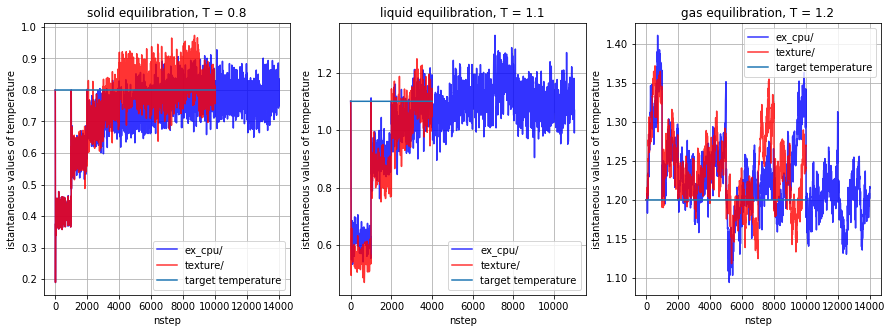

In [2]:
print("the precision in the device calculus is different from that of the cpu")
print("this is why the equilibration phases are different")
print("plotting together the istantaneaous values of temperature")

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

for j in range(3):
    for i in range(2):
        val = np.loadtxt(codes[i]+equilibrium+phases[j]+files[2],usecols=(0),delimiter=' ',unpack='true')
        if i==3:
            axs[j].plot(val,color=color[i],alpha=0.4)
        elif i==2:
            axs[j].plot(val,color=color[i],alpha=0.5)
        else:
            axs[j].plot(val,color=color[i],alpha=0.8)
        axs[j].set_ylabel("istantaneous values of temperature")
        axs[j].set_xlabel("nstep")
    y = np.full(len(val),temperature[j])
    x = np.arange(len(val))
    axs[j].plot(x,y)
    axs[j].grid(True)
    axs[j].set_title(title[j]+f", T = {temperature[j]}")
    axs[j].legend(codes)
    
plt.savefig("temp_equilibration_galileo.png") 
plt.show()

the results obtained with the gpu devices are very similar, almost equal
try to plot their difference respect to the cpu code


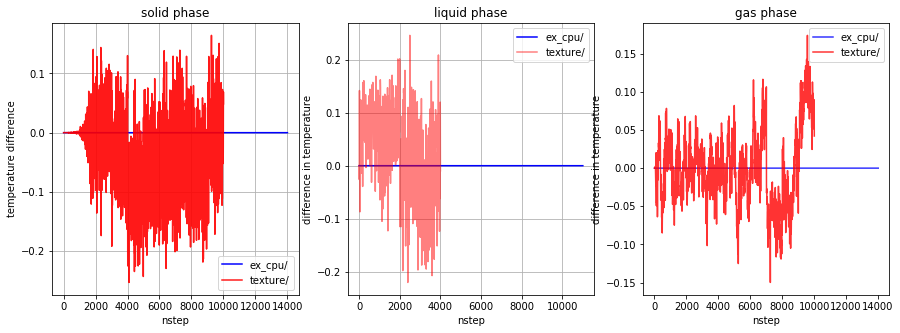

In [3]:
print("the results obtained with the gpu devices are very similar, almost equal")
print("try to plot their difference respect to the cpu code")

codes = "ex_cpu/","texture/"

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

#### solid #####

temp0 = np.loadtxt(codes[0]+equilibrium+phases[0]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = np.loadtxt(codes[1]+equilibrium+phases[0]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = temp0[0:len(temp1)]-temp1
temp0 = temp0-temp0

axs[0].plot(temp0,color=color[0],alpha=1)
axs[0].plot(temp1,color=color[1],alpha=0.9)
axs[0].grid(True)
axs[0].set_ylabel("temperature difference")
axs[0].set_xlabel("nstep")
axs[0].set_title("solid phase")
axs[0].legend(codes)


#### liquid #####

temp0 = np.loadtxt(codes[0]+equilibrium+phases[1]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = np.loadtxt(codes[1]+equilibrium+phases[1]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = temp0[0:len(temp1)]-temp1
temp0 = temp0-temp0

axs[1].plot(temp0,color=color[0],alpha=1)
axs[1].plot(temp1,color=color[1],alpha=0.5)
axs[1].grid(True)
axs[1].set_ylabel("difference in temperature")
axs[1].set_xlabel("nstep")
axs[1].set_title("liquid phase")
axs[1].legend(codes)


#### gas #####

temp0 = np.loadtxt(codes[0]+equilibrium+phases[2]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = np.loadtxt(codes[1]+equilibrium+phases[2]+files[2],usecols=(0),delimiter=' ',unpack='true')
#temp1 = temp0-temp1[0:len(temp0)]
temp1 = temp0[:len(temp1)] - temp1
temp0 = temp0-temp0

axs[2].plot(temp0,color=color[0],alpha=0.8)
axs[2].plot(temp1,color=color[1],alpha=0.8)
axs[2].set_ylabel("difference in temperature")
axs[2].set_xlabel("nstep")
axs[2].set_title("gas phase")
axs[2].legend(codes)


plt.savefig("diff_temp_equilibration_galileo.png") 
plt.show()

In [4]:
print("but this is just the equilibration.. so the most important thing is comparing a single simulation after")
print("reached the target temperature")
print("so now I will show some results after this equilibration phase with the corresping values for:" )
print("----------------------------------------------------------------------------------------------")
print("- total energy","- kinetic energy","- potential energy","- pressure","- temperature","- pair correlation function g(r)",sep="\n")

but this is just the equilibration.. so the most important thing is comparing a single simulation after
reached the target temperature
so now I will show some results after this equilibration phase with the corresping values for:
----------------------------------------------------------------------------------------------
- total energy
- kinetic energy
- potential energy
- pressure
- temperature
- pair correlation function g(r)


Solid phase
ex_cpu/ :  kinetic energy   1.19487 error  0.000697474
texture/ :  kinetic energy   1.19955 error  0.000679991
-------------------------------------------------------------
ex_cpu/ :  potential energy   -7.52851 error  0.000679991
texture/ :  potential energy   -7.52347 error  0.000809351
-------------------------------------------------------------
ex_cpu/ :  total energy   -6.33365 error  nan
texture/ :  total energy   -6.32392 error  0.000277605
-------------------------------------------------------------
ex_cpu/ :  temperature   0.796577 error  0.000468137
texture/ :  temperature   0.7997 error  0.00045377
-------------------------------------------------------------
ex_cpu/ :  pressure   7.68533 error  0.00382148
texture/ :  pressure   7.71904 error  0.00350597
-------------------------------------------------------------


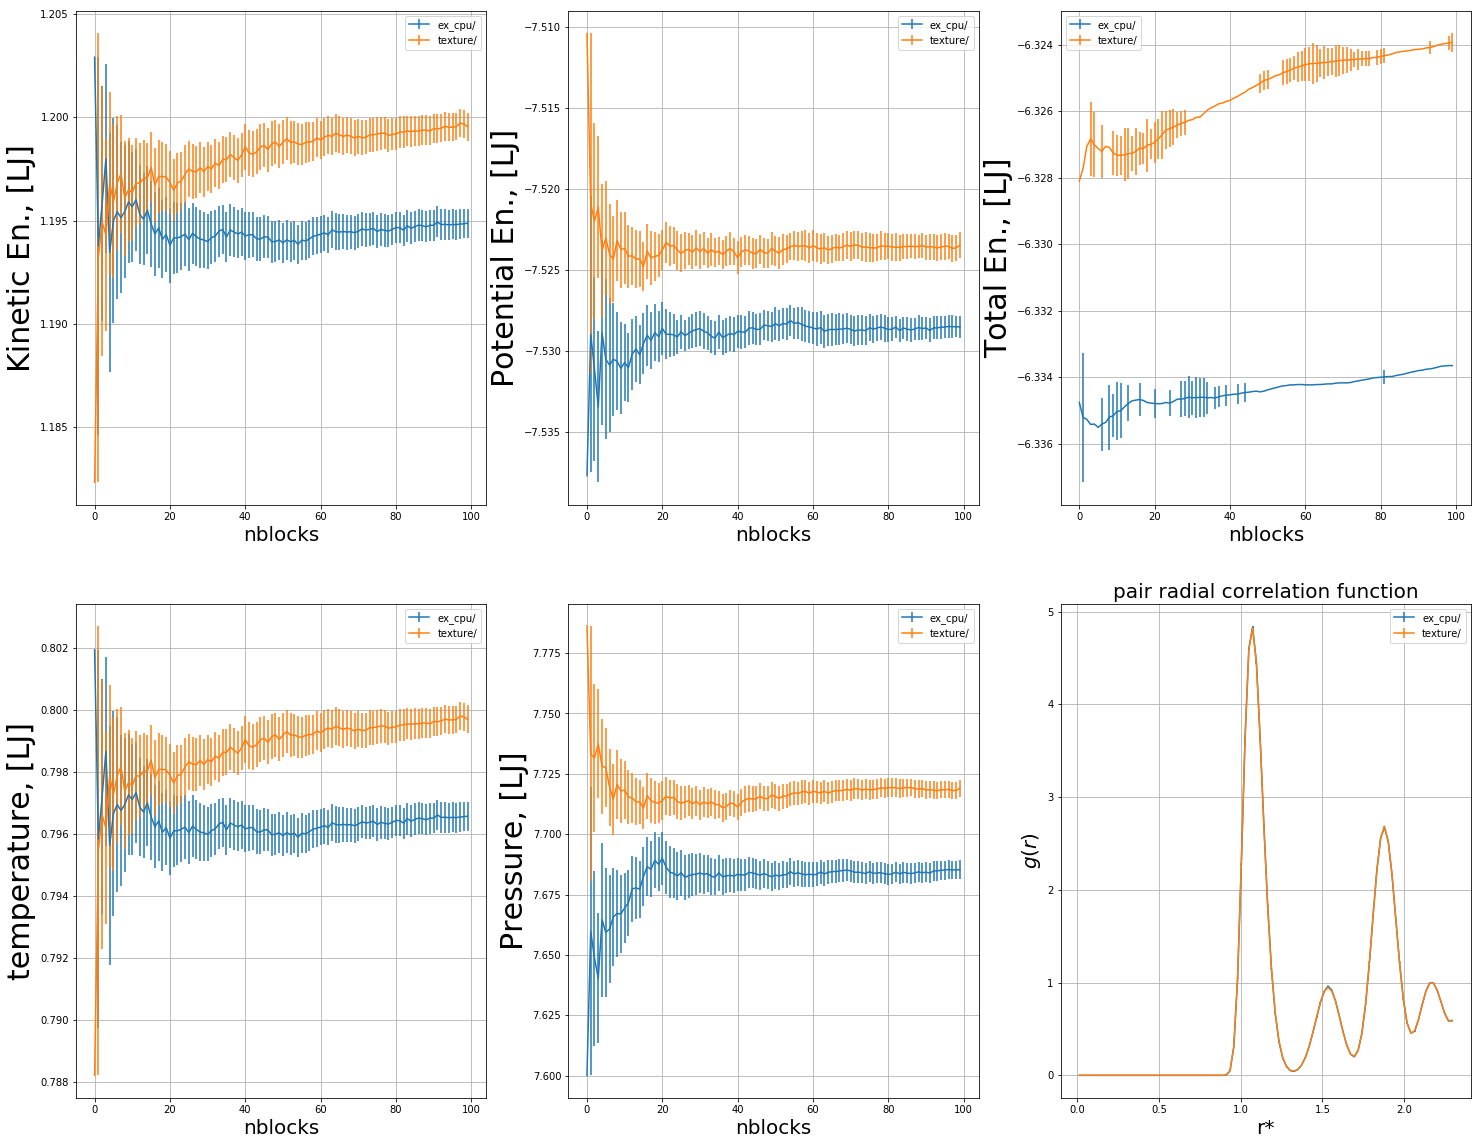

Liquid phase
ex_cpu/ :  kinetic energy   1.63656 error  0.00297253
texture/ :  kinetic energy   1.64703 error  0.00280496
-------------------------------------------------------------
ex_cpu/ :  potential energy   -5.46079 error  0.00302513
texture/ :  potential energy   -5.45889 error  0.00286485
-------------------------------------------------------------
ex_cpu/ :  total energy   -3.82423 error  0.0
texture/ :  total energy   -3.81186 error  nan
-------------------------------------------------------------
ex_cpu/ :  temperature   1.09104 error  0.00198159
texture/ :  temperature   1.09802 error  0.00186901
-------------------------------------------------------------
ex_cpu/ :  pressure   1.41609 error  0.0159676
texture/ :  pressure   1.43525 error  0.0133147
-------------------------------------------------------------


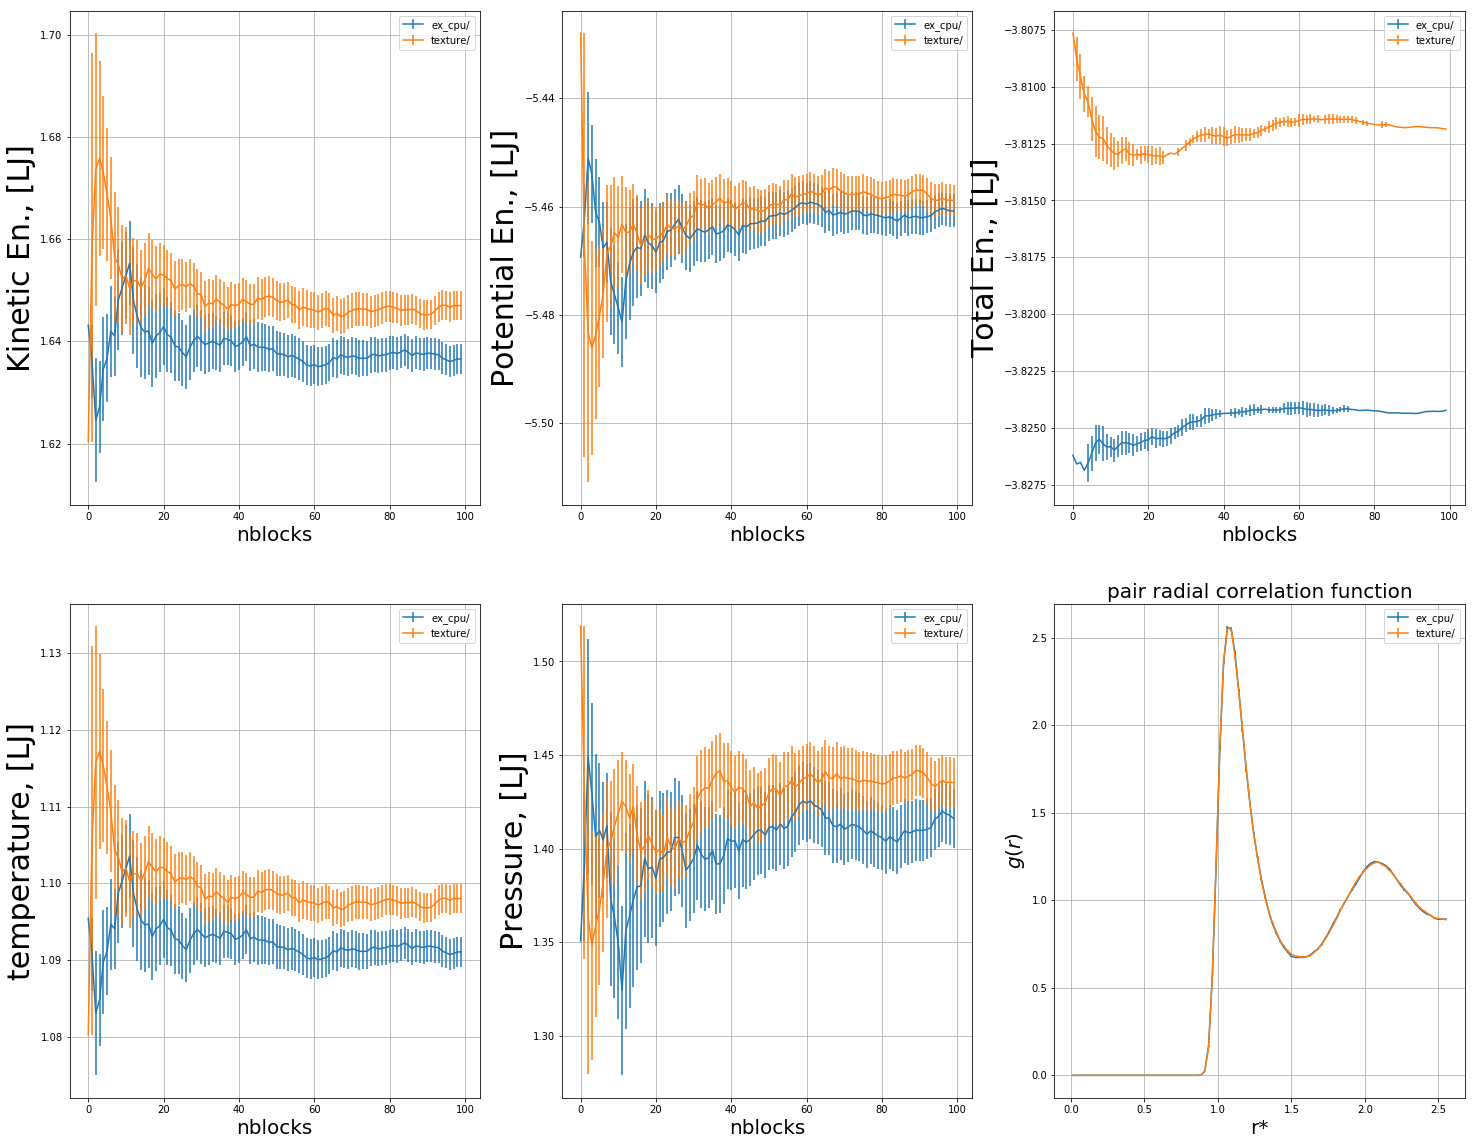

Gas phase
ex_cpu/ :  kinetic energy   2.0011 error  0.0152291
texture/ :  kinetic energy   2.13394 error  0.0178603
-------------------------------------------------------------
ex_cpu/ :  potential energy   -0.385704 error  0.00428249
texture/ :  potential energy   -0.371364 error  0.0043482
-------------------------------------------------------------
ex_cpu/ :  total energy   1.61539 error  0.0173006
texture/ :  total energy   1.76258 error  0.0185169
-------------------------------------------------------------
ex_cpu/ :  temperature   1.33407 error  0.0101534
texture/ :  temperature   1.42263 error  0.0119068
-------------------------------------------------------------
ex_cpu/ :  pressure   0.056135 error  0.000669935
texture/ :  pressure   0.0615851 error  0.00070022
-------------------------------------------------------------


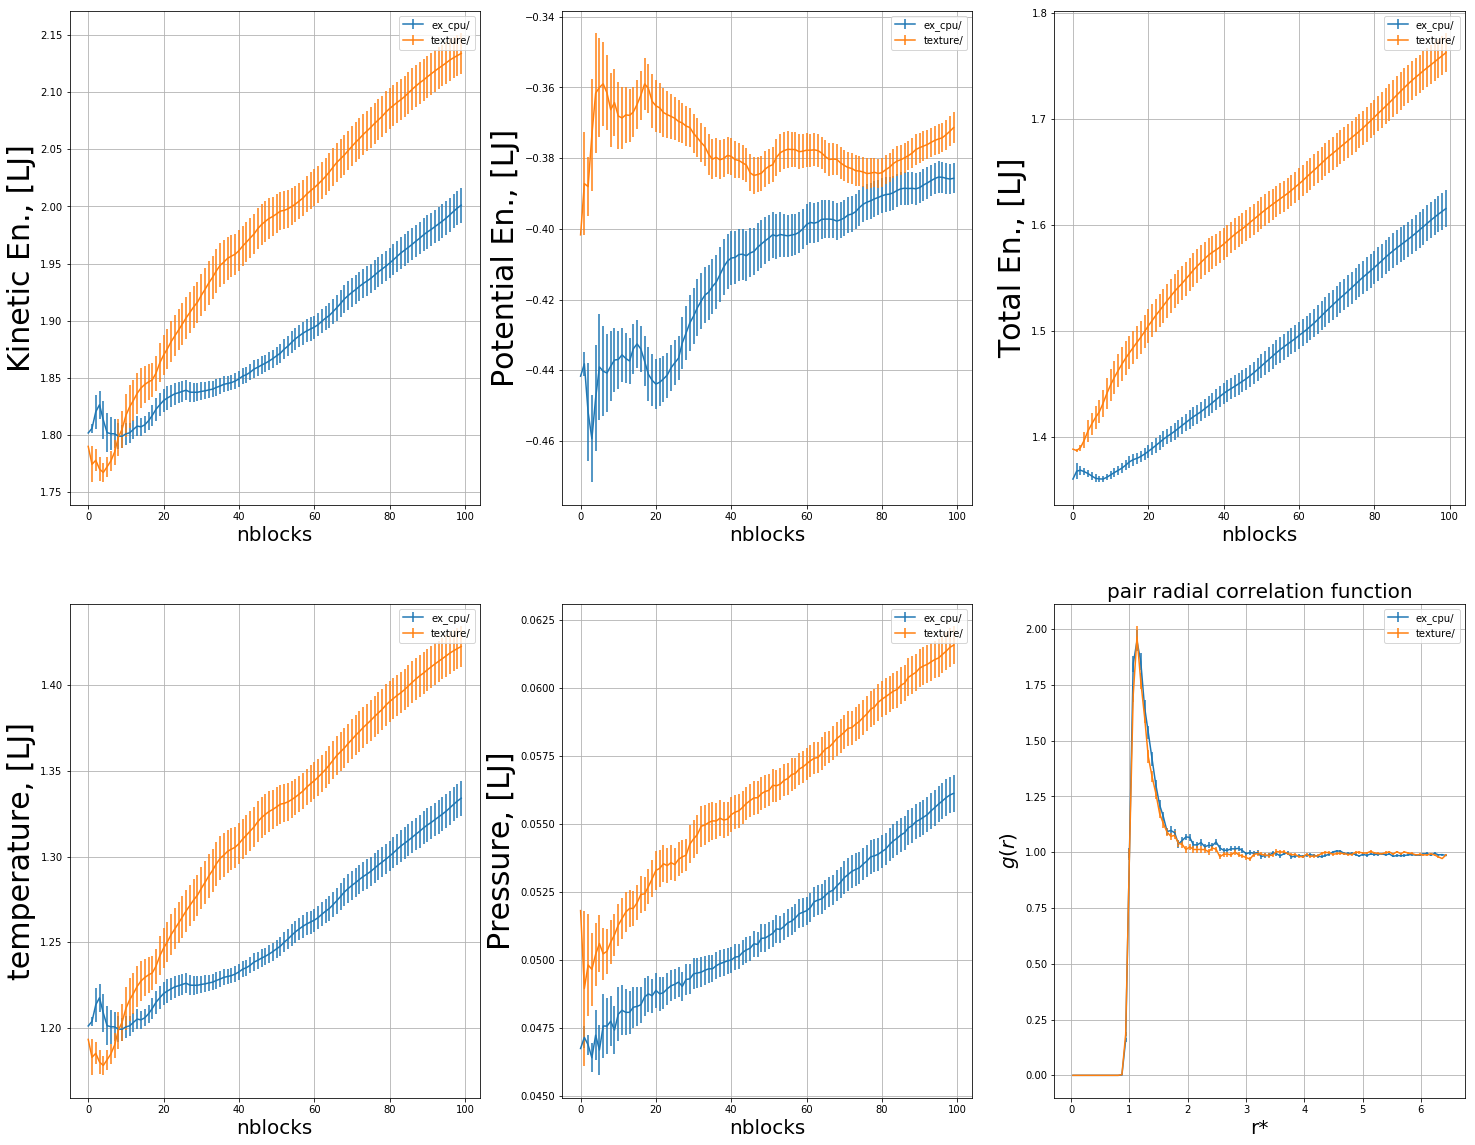

In [5]:
nstep=100000
N=100
x = np.arange(N)

codes = "ex_cpu/","texture/"
equilibrium = "raggiungimento_eq/"
phases = "solid/","liquid/","gas/"
files = ["ave_ekin"+str(nstep)+".out","ave_epot"+str(nstep)+".out",
"ave_etot"+str(nstep)+".out","ave_temp"+str(nstep)+".out",
"ave_press"+str(nstep)+".out"]
properties = "kinetic energy","potential energy","total energy","temperature","pressure"
color = "blue","red","orange","green","black"
e_col = "red","blue","green","silver","cyan","ivory","orchid"
y_lab = "Kinetic En., [LJ]","Potential En., [LJ]","Total En., [LJ]","temperature, [LJ]","Pressure, [LJ]"

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

###################### SOLID PHASE ####################################

print("Solid phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            for l in range(2):
                y = np.loadtxt(codes[l]+phases[0]+"output.gave.out",usecols=(0),unpack='true')
                sum_prog,err_prog = np.loadtxt(codes[l]+phases[0]+"output.gave.out",usecols=(1,2),unpack='true')
                axs[i][j].errorbar(y,sum_prog,yerr=err_prog)
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
            axs[i][j].legend(codes)
        else:
            for l in range(2):
                sum_prog,err_prog = np.loadtxt(codes[l]+phases[0]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
                axs[i][j].errorbar(x,sum_prog,yerr=err_prog)
                print(codes[l],": ",properties[k]," ",sum_prog[N-1],"error ",err_prog[N-1])
            print("-------------------------------------------------------------")
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
            axs[i][j].legend(codes)
        axs[i][j].grid(True)
        k=k+1
        
plt.savefig("solid_float_galileo.png") 
plt.show()

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

######################## LIQUID PHASE ##########################################

print("Liquid phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            for l in range(2):
                y = np.loadtxt(codes[l]+phases[1]+"output.gave.out",usecols=(0),unpack='true')
                sum_prog,err_prog = np.loadtxt(codes[l]+phases[1]+"output.gave.out",usecols=(1,2),unpack='true')
                axs[i][j].errorbar(y,sum_prog,yerr=err_prog)#,color=e_col[1],ecolor=e_col[0])
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
            axs[i][j].legend(codes)
        else:
            for l in range(2):
                sum_prog,err_prog = np.loadtxt(codes[l]+phases[1]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
                axs[i][j].errorbar(x,sum_prog,yerr=err_prog)#,color=color[k],ecolor=e_col[1])
                print(codes[l],": ",properties[k]," ",sum_prog[N-1],"error ",err_prog[N-1])
            print("-------------------------------------------------------------")
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
            axs[i][j].legend(codes)
        axs[i][j].grid(True)
        k=k+1
       
plt.savefig("liquid_float_galileo.png")
plt.show()

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

###################################### GAS PHASE ###################################

print("Gas phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            for l in range(2):
                y = np.loadtxt(codes[l]+phases[2]+"output.gave.out",usecols=(0),unpack='true')
                sum_prog,err_prog = np.loadtxt(codes[l]+phases[2]+"output.gave.out",usecols=(1,2),unpack='true')
                axs[i][j].errorbar(y,sum_prog,yerr=err_prog)#,color=e_col[1],ecolor=e_col[0])
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
            axs[i][j].legend(codes)
        else:
            for l in range(2):
                sum_prog,err_prog = np.loadtxt(codes[l]+phases[2]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
                axs[i][j].errorbar(x,sum_prog,yerr=err_prog)#,color=color[k],ecolor=e_col[1])
                print(codes[l],": ",properties[k]," ",sum_prog[N-1],"error ",err_prog[N-1])
            print("-------------------------------------------------------------")
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
            axs[i][j].legend(codes)
        axs[i][j].grid(True)
        k=k+1
        
plt.savefig("gas_float_galileo.png")
plt.show()

In [6]:
print("we can plot again their difference, just to understand how much they are different")
print("we are not dealing with error difference but just their values")
print("as the results on the gpu are the same for all codes, I will plot the difference between cpu code")
print("and just one of the gpu codes (texture one)")

we can plot again their difference, just to understand how much they are different
we are not dealing with error difference but just their values
as the results on the gpu are the same for all codes, I will plot the difference between cpu code
and just one of the gpu codes (texture one)


Solid phase
-------------------------------------------------------------


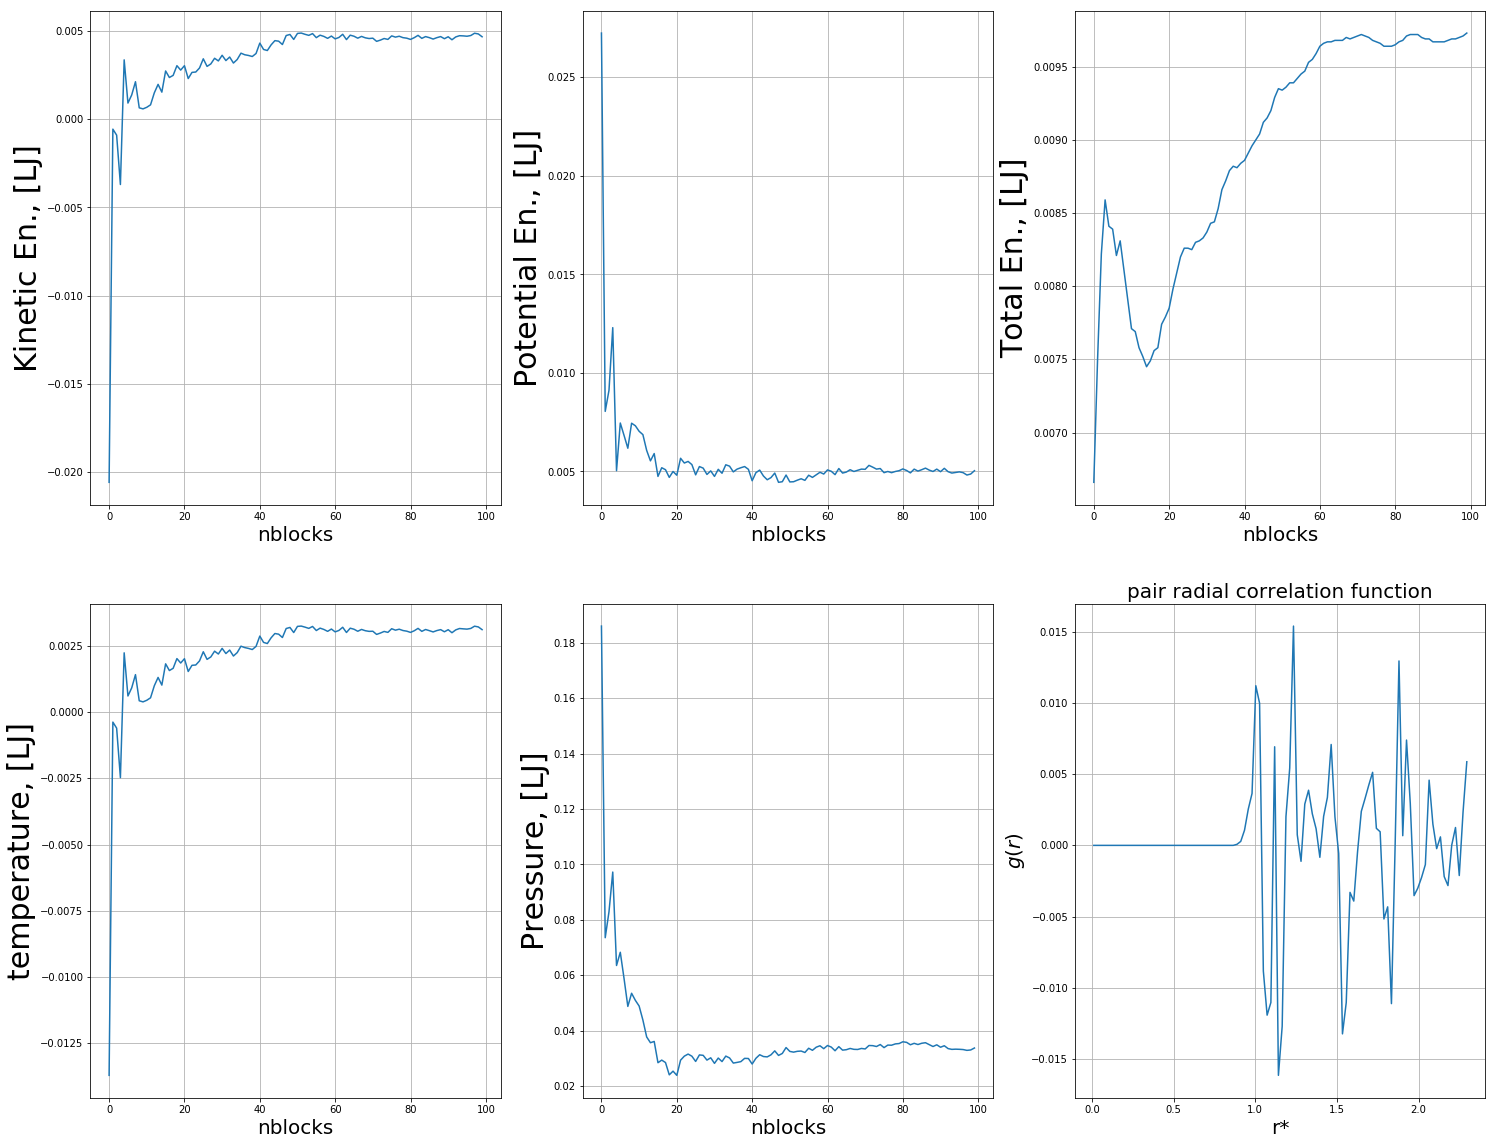

Liquid phase
-------------------------------------------------------------


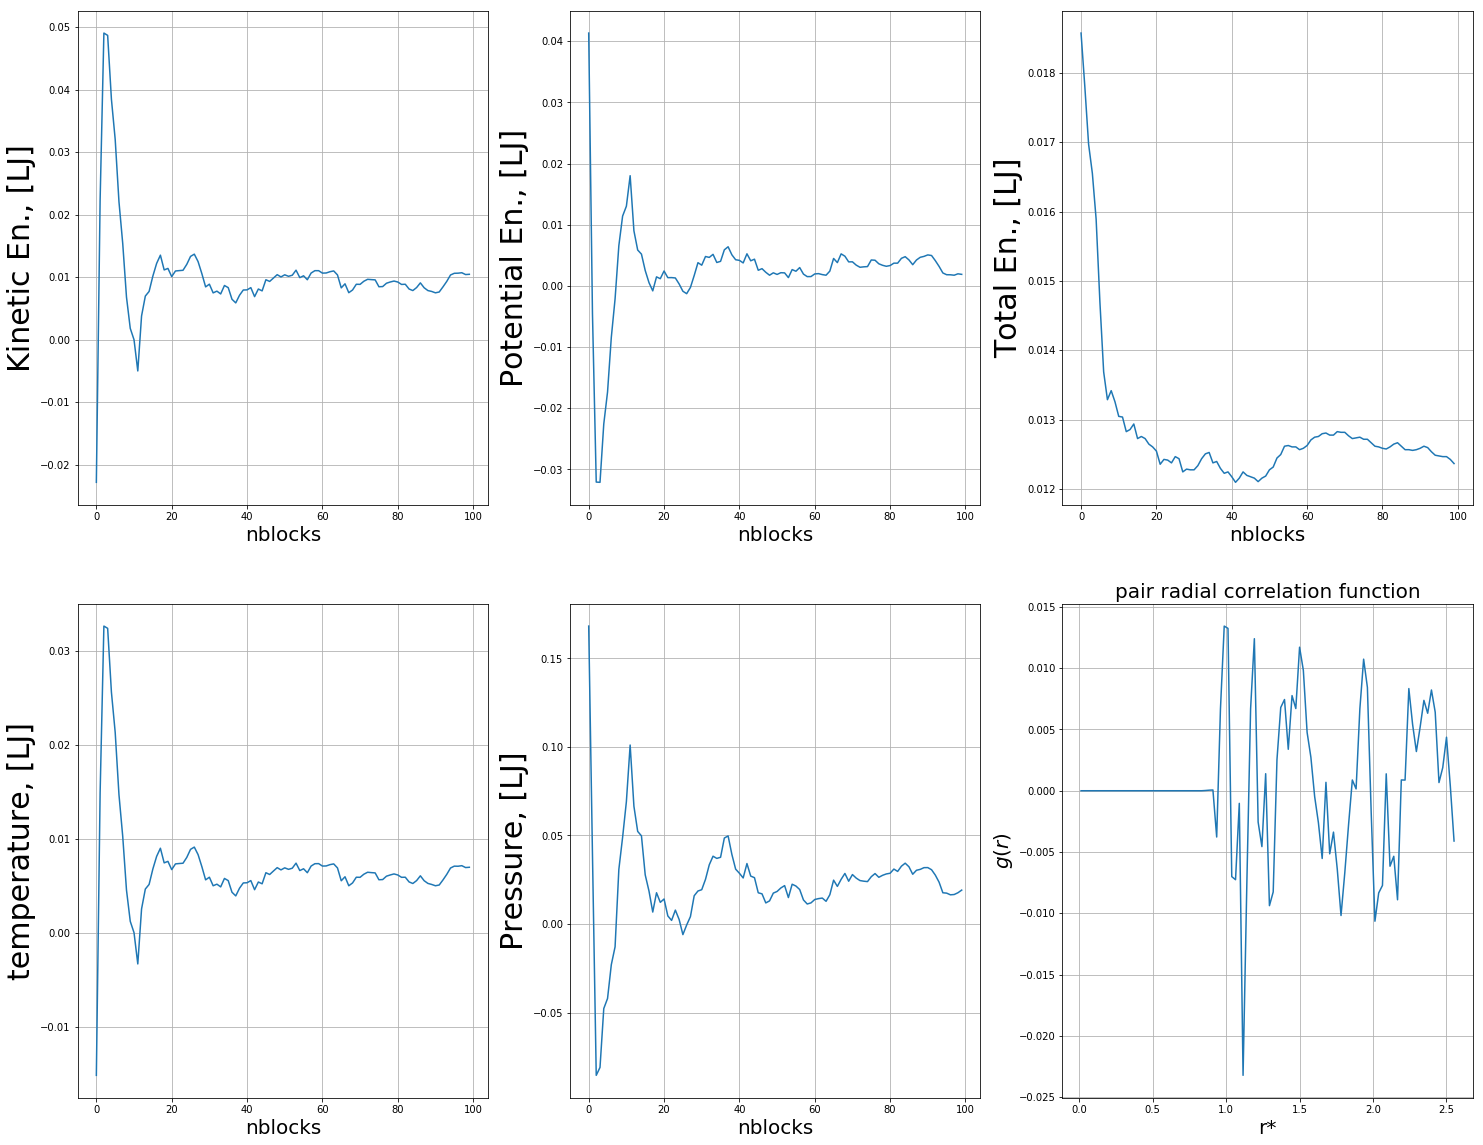

Gas phase
-------------------------------------------------------------


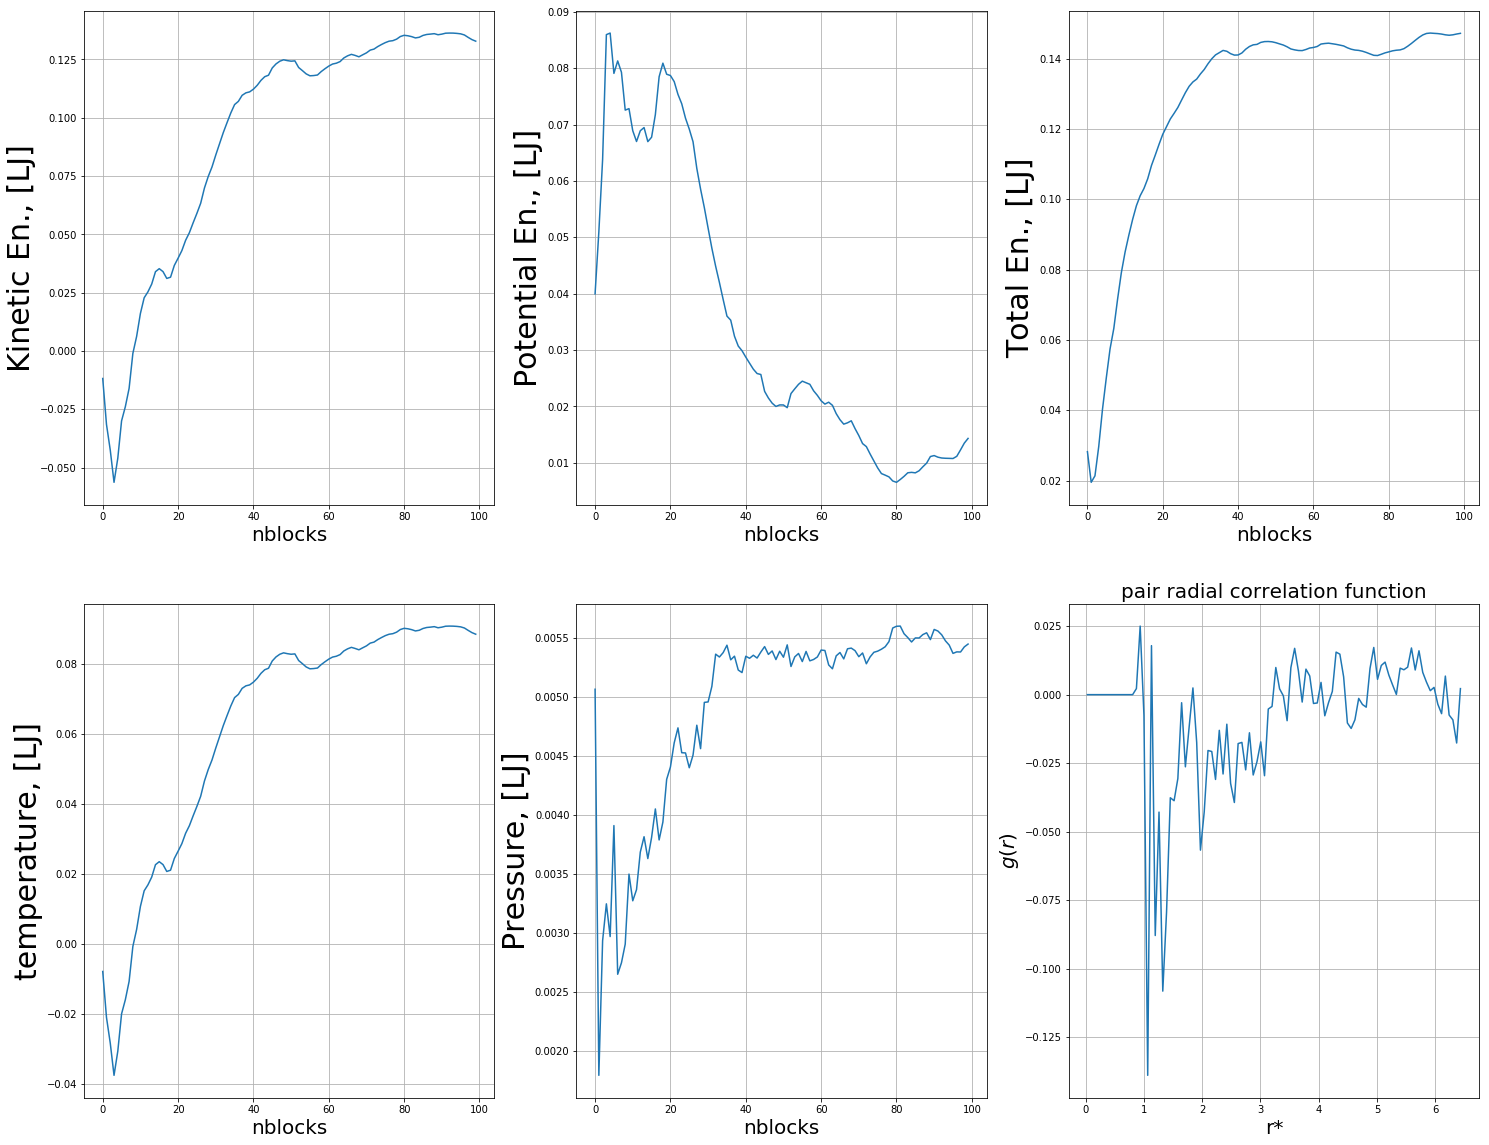

In [7]:
###################### SOLID PHASE ####################################
fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

print("Solid phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            y = np.loadtxt(codes[0]+phases[0]+"output.gave.out",usecols=(0),unpack='true')
            sum_prog0,err_prog0 = np.loadtxt(codes[0]+phases[0]+"output.gave.out",usecols=(1,2),unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(codes[1]+phases[0]+"output.gave.out",usecols=(1,2),unpack='true')    
            axs[i][j].plot(y,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
        else:
            sum_prog0,err_prog0 = np.loadtxt(codes[0]+phases[0]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(codes[1]+phases[0]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            axs[i][j].plot(x,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
        axs[i][j].grid(True)
        k=k+1
        
print("-------------------------------------------------------------")

plt.savefig("diff_solid_float_galileo.png")
plt.show()

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

######################## LIQUID PHASE ##########################################

print("Liquid phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            y = np.loadtxt(codes[0]+phases[1]+"output.gave.out",usecols=(0),unpack='true')
            sum_prog0,err_prog0 = np.loadtxt(codes[0]+phases[1]+"output.gave.out",usecols=(1,2),unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(codes[1]+phases[1]+"output.gave.out",usecols=(1,2),unpack='true')    
            axs[i][j].plot(y,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
        else:
            sum_prog0,err_prog0 = np.loadtxt(codes[0]+phases[1]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(codes[1]+phases[1]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            axs[i][j].plot(x,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
        axs[i][j].grid(True)
        k=k+1
        
print("-------------------------------------------------------------")
plt.savefig("diff_liquid_float_galileo.png")
plt.show()

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

###################################### GAS PHASE ###################################

print("Gas phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            y = np.loadtxt(codes[0]+phases[2]+"output.gave.out",usecols=(0),unpack='true')
            sum_prog0,err_prog0 = np.loadtxt(codes[0]+phases[2]+"output.gave.out",usecols=(1,2),unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(codes[1]+phases[2]+"output.gave.out",usecols=(1,2),unpack='true')    
            axs[i][j].plot(y,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
        else:
            sum_prog0,err_prog0 = np.loadtxt(codes[0]+phases[2]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(codes[1]+phases[2]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            axs[i][j].plot(x,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
        axs[i][j].grid(True)
        k=k+1
        
print("-------------------------------------------------------------")

plt.savefig("diff_gas_float_galileo.png")
plt.show()

In [8]:
print("the second thing to do is understand if we could earn time from these simulations")
print("so in the next step I will plot the time excution in function of particles number")
print("and then I will plot the effiency (time/time) to understand the speedup of the parallel simulation")

the second thing to do is understand if we could earn time from these simulations
so in the next step I will plot the time excution in function of particles number
and then I will plot the effiency (time/time) to understand the speedup of the parallel simulation


simulation of 10'000 steps for solid phase starting from a fcc lattice configure
-------------------------------------------------------------


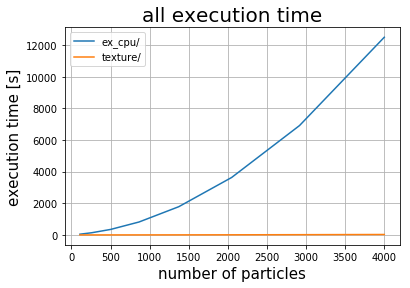

-------------------------------------------------------------


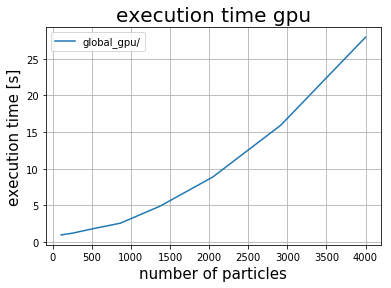

execution time for cpu in seconds: [   46.2    135.87   347.48   818.04  1784.69  3631.75  6914.36 12497.6 ]
################################################
execution time for gpu global_gpu/  in sec: [ 0.970944  1.21622   1.78538   2.56979   4.89521   8.88378  15.9451
 27.9502  ]
speedup for  global_gpu/  :  [ 47.58255883 111.71498578 194.62523384 318.32951331 364.5788434
 408.80683673 433.63541151 447.13812424]
################################################


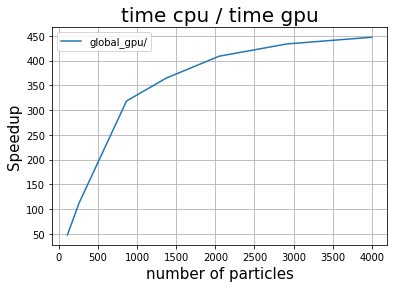

In [9]:
simulationtime = ["../simulation_cpu.time","texture/simulation.time"]

print("simulation of 10'000 steps for solid phase starting from a fcc lattice configure")

for j in range(2):
        x,time = np.loadtxt(simulationtime[j],usecols=(0,1),unpack='true')
        time = time/1000 #in second
        plt.plot(x,time)
        plt.xlabel("number of particles",fontsize=15)
        plt.ylabel("execution time [s]",fontsize=15)
        plt.legend(codes)
        plt.title("all execution time",fontsize=20)
        plt.grid(True)
        
print("-------------------------------------------------------------")

plt.savefig("ex_time_float_galileo.png")
plt.show()

codes = "global_gpu/","portable_gpu/","texture_gpu/"

for j in range(1):
        x,time = np.loadtxt(simulationtime[j+1],usecols=(0,1),unpack='true')
        time = time/1000 #in second
        plt.plot(x,time)
        plt.xlabel("number of particles",fontsize=15)
        plt.ylabel("execution time [s]",fontsize=15)
        plt.legend(codes)
        plt.title("execution time gpu",fontsize=20)
        plt.grid(True)
        
print("-------------------------------------------------------------")

plt.savefig("ex_time_float_gpu_galileo.png")
plt.show()
    
x,time0 = np.loadtxt(simulationtime[0],usecols=(0,1),unpack='true')
time0 = time0/1000

print("execution time for cpu in seconds:",time0)

for j in range(1):
        x,time = np.loadtxt(simulationtime[j+1],usecols=(0,1),unpack='true')
        time = time/1000 #in second
        print("################################################")
        print("execution time for gpu", codes[j], " in sec:",time)
        speedup = time0/time
        print("speedup for ",codes[j]," : ",speedup)
        print("################################################")
        plt.plot(x,speedup)
        plt.xlabel("number of particles",fontsize=15)
        plt.ylabel("Speedup",fontsize=15)
        plt.title("time cpu / time gpu",fontsize=20)
        plt.legend(codes)
        plt.grid(True)

plt.savefig("speedup_float_galileo.png")
plt.show()

In [10]:
print("for the calculus I've used a specific configure for number of blocks and threads per block")

for the calculus I've used a specific configure for number of blocks and threads per block


In [11]:
print("let's have a look to the double precision codes")

let's have a look to the double precision codes


cpu code, double point precision


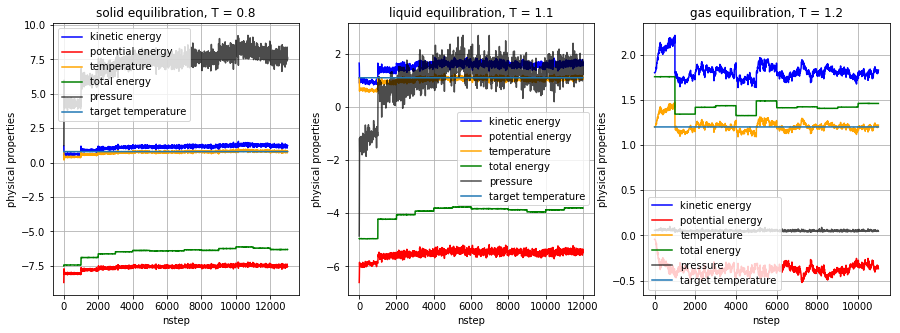

gpu code texture memory, double point precision galileo


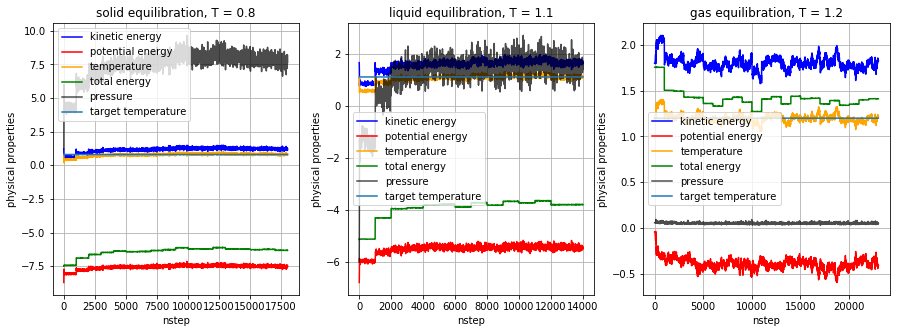

In [12]:

nstep=10000
equilibrium = "raggiungimento_eq/"
phases = "solid/","liquid/","gas/"
files = ["output_ekin"+str(nstep)+".dat","output_epot"+str(nstep)+".dat",
"output_temp"+str(nstep)+".dat","output_etot"+str(nstep)+".dat",
"output_press"+str(nstep)+".dat"]
temperature = 0.8,1.1,1.2
properties = "kinetic energy","potential energy","temperature","total energy","pressure","target temperature"
title = "solid equilibration","liquid equilibration","gas equilibration"
color = "blue","red","orange","green","black"

print("cpu code, double point precision")    
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

for j in range(3):
    for i in range(5):
        val = np.loadtxt(double_codes[0]+equilibrium+phases[j]+files[i],usecols=(0),delimiter=' ',unpack='true')
        if (i == 4):
            axs[j].plot(val,color=color[i],alpha=0.7)
        else:
            axs[j].plot(val,color=color[i])
        axs[j].set_ylabel("physical properties")
        axs[j].set_xlabel("nstep")
    y = np.full(len(val),temperature[j])
    x = np.arange(len(val))
    axs[j].plot(x,y)
    axs[j].grid(True)
    axs[j].set_title(title[j]+f", T = {temperature[j]}")
    axs[j].legend(properties)
    
plt.savefig("cpu_equilibration_double_galileo.png")
plt.show()

print("gpu code texture memory, double point precision galileo")    

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

for j in range(3):
    for i in range(5):
        val = np.loadtxt(double_codes[1]+equilibrium+phases[j]+files[i],usecols=(0),delimiter=' ',unpack='true')
        if (i == 4):
            axs[j].plot(val,color=color[i],alpha=0.7)
        else:
            axs[j].plot(val,color=color[i])
        axs[j].set_ylabel("physical properties")
        axs[j].set_xlabel("nstep")
    y = np.full(len(val),temperature[j])
    x = np.arange(len(val))
    axs[j].plot(x,y)
    axs[j].grid(True)
    axs[j].set_title(title[j]+f", T = {temperature[j]}")
    axs[j].legend(properties)
    
plt.savefig("texture_equilibration_double_galileo.png")
plt.show()

the precision in the device calculus is different from that of the cpu
this is why the equilibration phases are different
plotting together the istantaneaous values of temperature


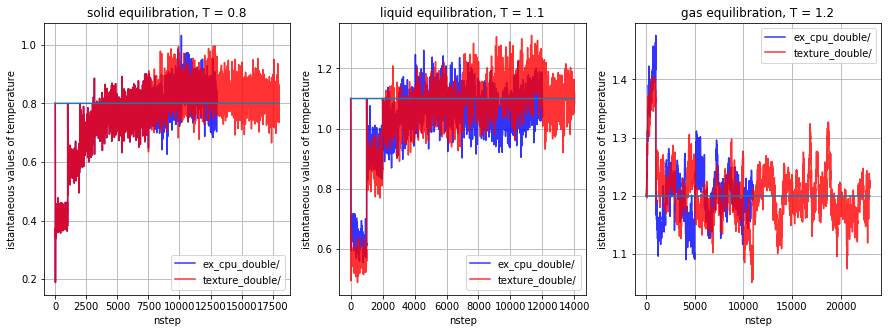

In [13]:
print("the precision in the device calculus is different from that of the cpu")
print("this is why the equilibration phases are different")
print("plotting together the istantaneaous values of temperature")

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

for j in range(3):
    for i in range(2):
        val = np.loadtxt(double_codes[i]+equilibrium+phases[j]+files[2],usecols=(0),delimiter=' ',unpack='true')
        if i==3:
            axs[j].plot(val,color=color[i],alpha=0.4)
        elif i==2:
            axs[j].plot(val,color=color[i],alpha=0.5)
        else:
            axs[j].plot(val,color=color[i],alpha=0.8)
        axs[j].set_ylabel("istantaneous values of temperature")
        axs[j].set_xlabel("nstep")
    y = np.full(len(val),temperature[j])
    x = np.arange(len(val))
    axs[j].plot(x,y)
    axs[j].grid(True)
    axs[j].set_title(title[j]+f", T = {temperature[j]}")
    axs[j].legend(double_codes)

plt.savefig("temp_equilibration_double_galileo.png")
plt.show()

In [14]:
print("we see that, as expected, the precision in gpu device is better than cpu code for simple operations")
print("this is in accordance with the fact that gpu code needs more steps to really equilibrate")

we see that, as expected, the precision in gpu device is better than cpu code for simple operations
this is in accordance with the fact that gpu code needs more steps to really equilibrate


try to plot their difference respect to the cpu code


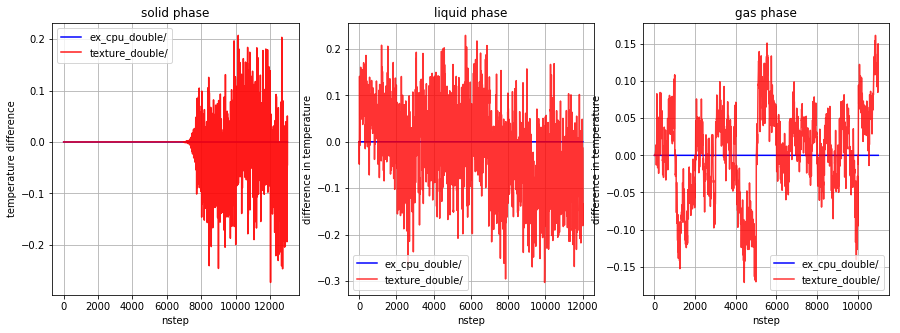

In [15]:
print("try to plot their difference respect to the cpu code")

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

#### solid #####

temp0 = np.loadtxt(double_codes[0]+equilibrium+phases[0]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = np.loadtxt(double_codes[1]+equilibrium+phases[0]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = temp0-temp1[0:len(temp0)]
#temp1 = temp0[0:len(temp1)]-temp1
temp0=temp0-temp0

axs[0].plot(temp0,color=color[0],alpha=1)
axs[0].plot(temp1,color=color[1],alpha=0.9)
axs[0].grid(True)
axs[0].set_ylabel("temperature difference")
axs[0].set_xlabel("nstep")
axs[0].set_title("solid phase")
axs[0].legend(double_codes)


#### liquid #####

temp0 = np.loadtxt(double_codes[0]+equilibrium+phases[1]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = np.loadtxt(double_codes[1]+equilibrium+phases[1]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = temp0-temp1[0:len(temp0)]
#temp1 = temp0[0:len(temp1)]-temp1
temp0 = temp0-temp0

axs[1].plot(temp0,color=color[0],alpha=1)
axs[1].plot(temp1,color=color[1],alpha=0.8)
axs[1].grid(True)
axs[1].set_ylabel("difference in temperature")
axs[1].set_xlabel("nstep")
axs[1].set_title("liquid phase")
axs[1].legend(double_codes)


#### gas #####

temp0 = np.loadtxt(double_codes[0]+equilibrium+phases[2]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = np.loadtxt(double_codes[1]+equilibrium+phases[2]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = temp0-temp1[0:len(temp0)]
temp0 = temp0-temp0

axs[2].plot(temp0,color=color[0],alpha=1)
axs[2].plot(temp1,color=color[1],alpha=0.8)
axs[2].grid(True)
axs[2].set_ylabel("difference in temperature")
axs[2].set_xlabel("nstep")
axs[2].set_title("gas phase")
axs[2].legend(double_codes)

plt.savefig("diff_temp_equilibration_double_galileo.png")
plt.show()

In [16]:
print("but this is just the equilibration.. so the most important thing is comparing a single simulation after")
print("reached the target temperature")
print("so now I will show some results after this equilibration phase with the corresping values for:" )
print("----------------------------------------------------------------------------------------------")
print("- total energy","- kinetic energy","- potential energy","- pressure","- temperature","- pair correlation function g(r)",sep="\n")

but this is just the equilibration.. so the most important thing is comparing a single simulation after
reached the target temperature
so now I will show some results after this equilibration phase with the corresping values for:
----------------------------------------------------------------------------------------------
- total energy
- kinetic energy
- potential energy
- pressure
- temperature
- pair correlation function g(r)


Solid phase
global_gpu/ :  kinetic energy   1.2021 error  0.000714235
portable_gpu/ :  kinetic energy   1.19933 error  0.000740942
-------------------------------------------------------------
global_gpu/ :  potential energy   -7.52316 error  0.000740287
portable_gpu/ :  potential energy   -7.52542 error  0.000763392
-------------------------------------------------------------
global_gpu/ :  total energy   -6.32106 error  8.00702e-05
portable_gpu/ :  total energy   -6.32608 error  8.36797e-05
-------------------------------------------------------------
global_gpu/ :  temperature   0.801399 error  0.000476157
portable_gpu/ :  temperature   0.799555 error  0.000493961
-------------------------------------------------------------
global_gpu/ :  pressure   7.72027 error  0.00376931
portable_gpu/ :  pressure   7.70832 error  0.00369657
-------------------------------------------------------------


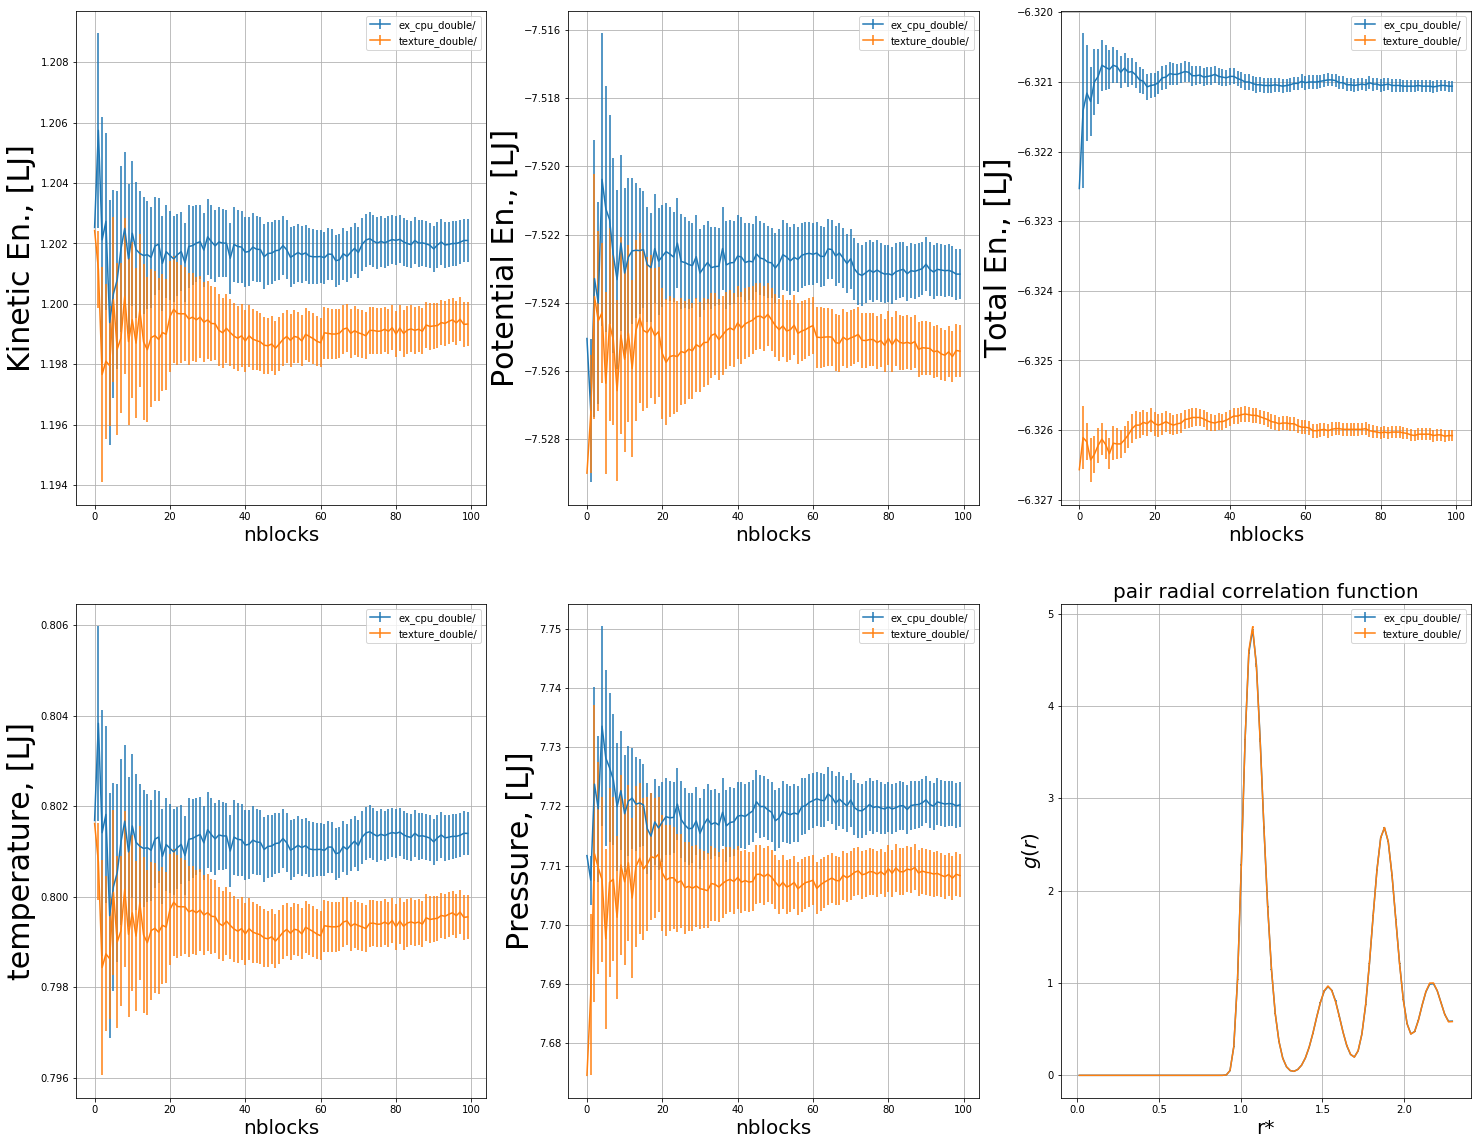

Liquid phase
global_gpu/ :  kinetic energy   1.64995 error  0.00275822
portable_gpu/ :  kinetic energy   1.64857 error  0.00249681
-------------------------------------------------------------
global_gpu/ :  potential energy   -5.44759 error  0.00283927
portable_gpu/ :  potential energy   -5.45026 error  0.00255185
-------------------------------------------------------------
global_gpu/ :  total energy   -3.79764 error  0.000168192
portable_gpu/ :  total energy   -3.80169 error  0.000150542
-------------------------------------------------------------
global_gpu/ :  temperature   1.09996 error  0.00183881
portable_gpu/ :  temperature   1.09905 error  0.00166454
-------------------------------------------------------------
global_gpu/ :  pressure   1.47295 error  0.0167198
portable_gpu/ :  pressure   1.46846 error  0.0142063
-------------------------------------------------------------


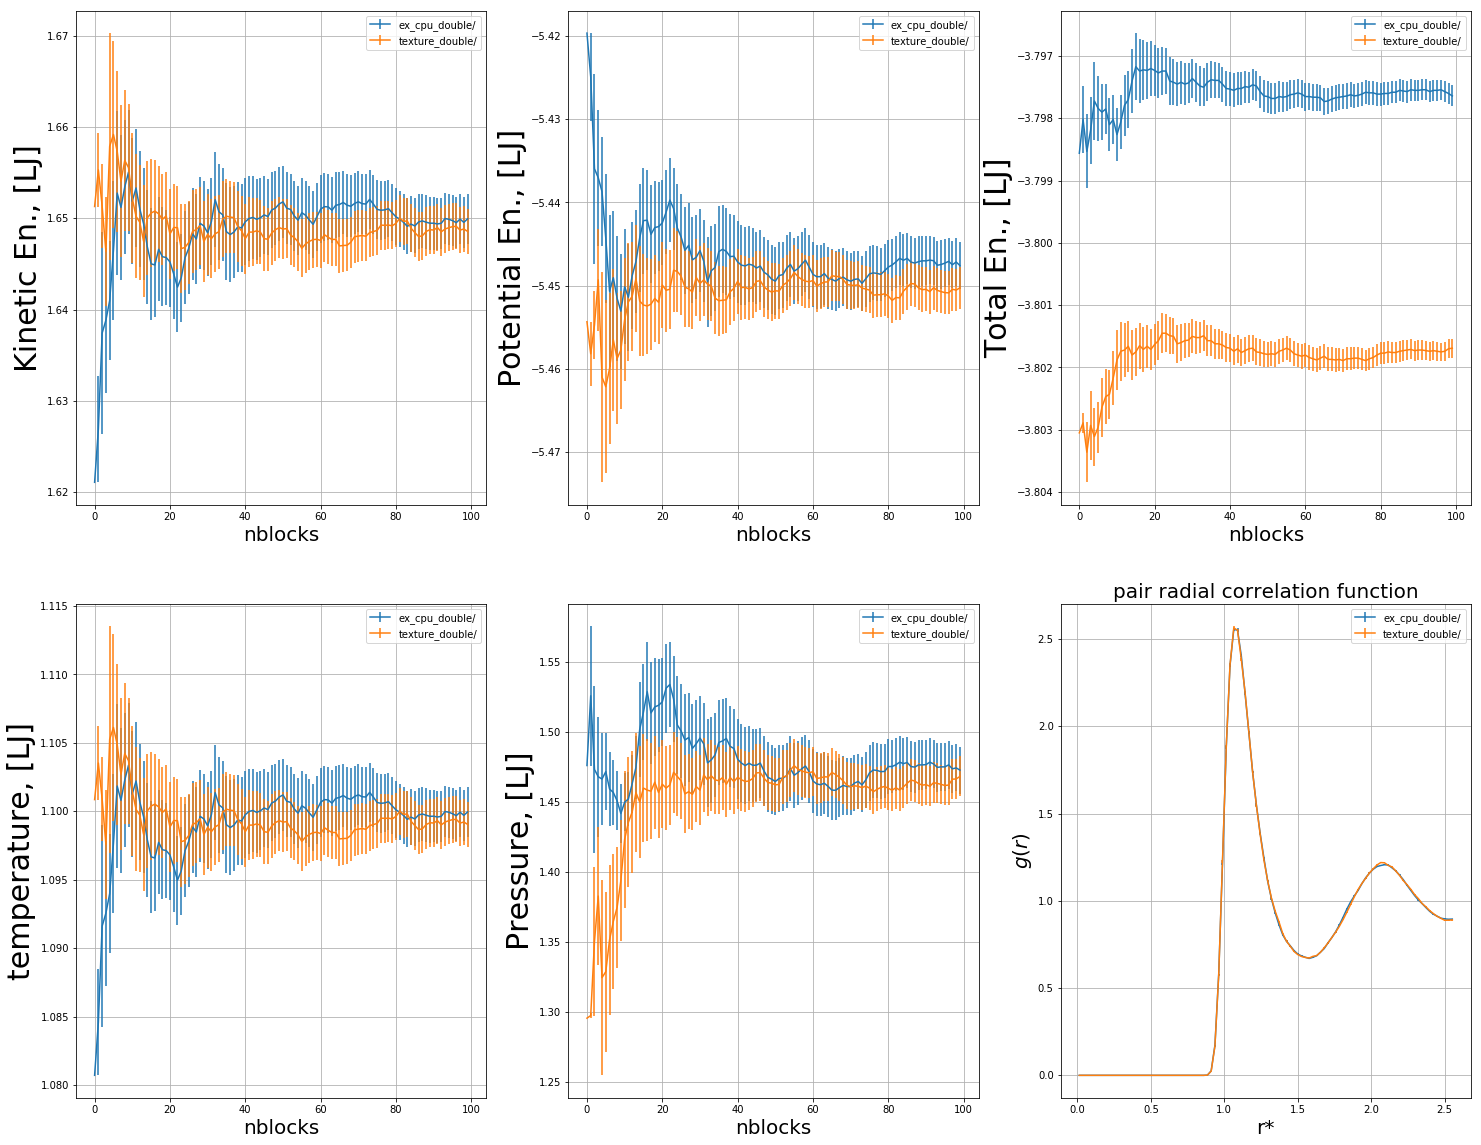

Gas phase
global_gpu/ :  kinetic energy   1.85679 error  0.00445675
portable_gpu/ :  kinetic energy   1.81425 error  0.0029515
-------------------------------------------------------------
global_gpu/ :  potential energy   -0.396818 error  0.00446001
portable_gpu/ :  potential energy   -0.401908 error  0.00295236
-------------------------------------------------------------
global_gpu/ :  total energy   1.45997 error  8.70665e-06
portable_gpu/ :  total energy   1.41234 error  7.65646e-06
-------------------------------------------------------------
global_gpu/ :  temperature   1.23786 error  0.00297117
portable_gpu/ :  temperature   1.2095 error  0.00196767
-------------------------------------------------------------
global_gpu/ :  pressure   0.0514349 error  0.000314033
portable_gpu/ :  pressure   0.0499108 error  0.000322112
-------------------------------------------------------------


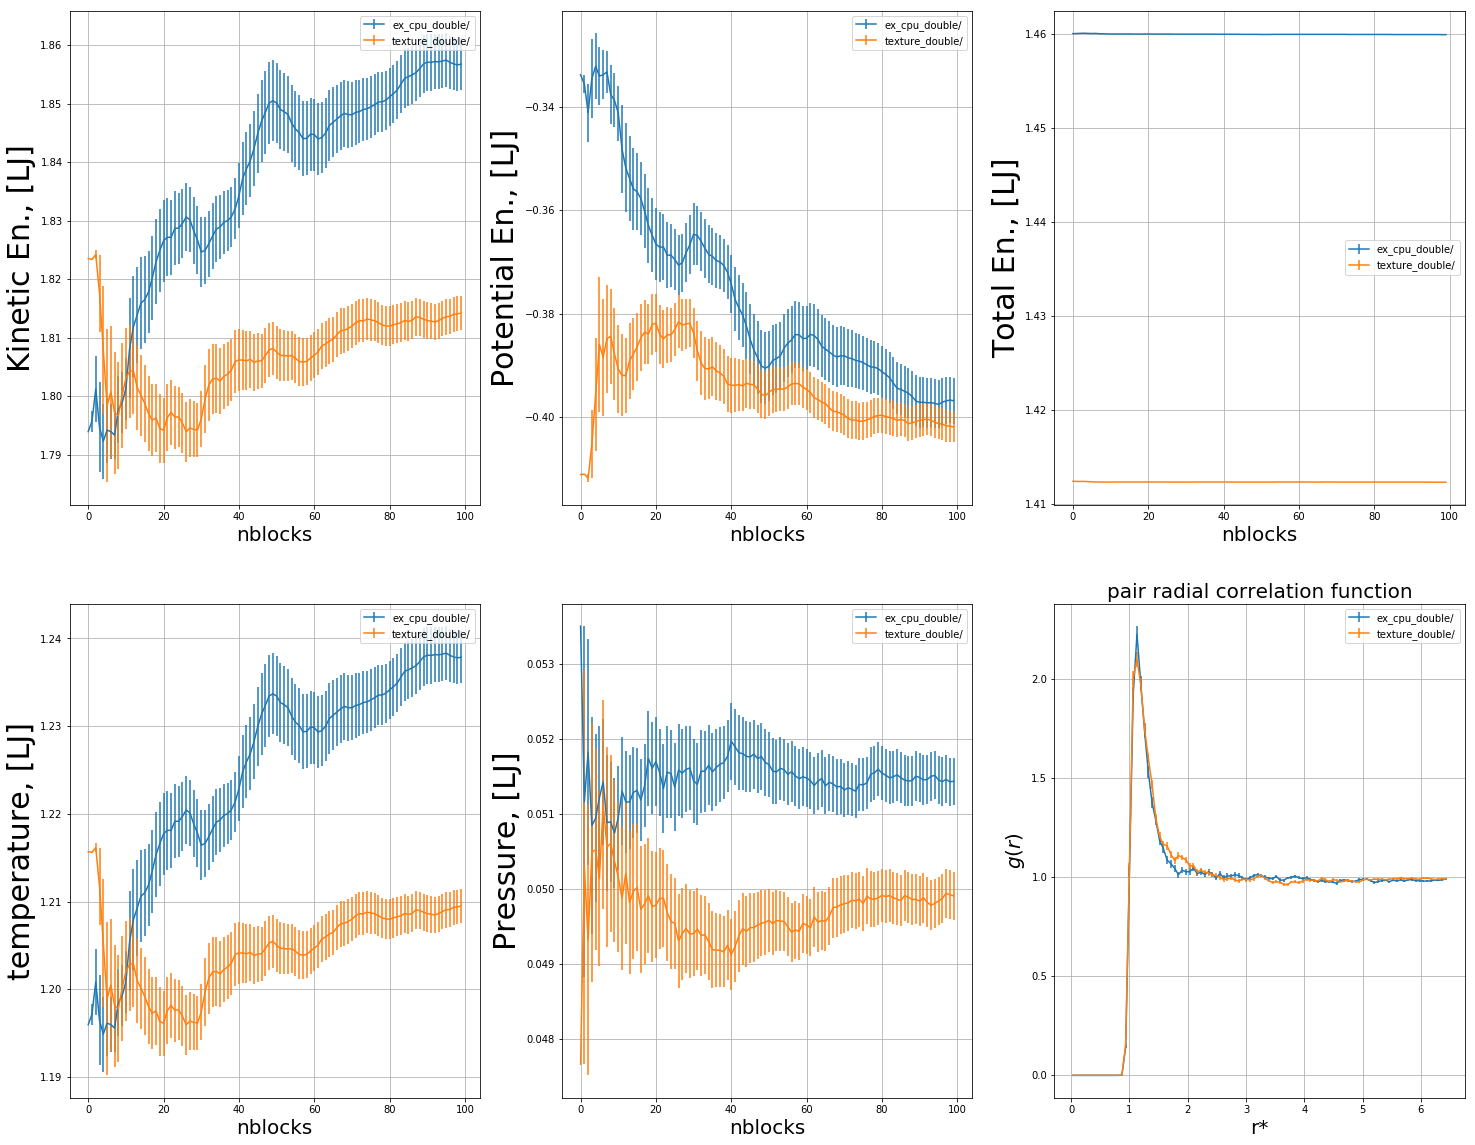

In [17]:
nstep=100000
N=100
x = np.arange(N)

phases = "solid/","liquid/","gas/"
files = ["ave_ekin"+str(nstep)+".out","ave_epot"+str(nstep)+".out",
"ave_etot"+str(nstep)+".out","ave_temp"+str(nstep)+".out",
"ave_press"+str(nstep)+".out"]
properties = "kinetic energy","potential energy","total energy","temperature","pressure"
color = "blue","red","orange","green","black"
e_col = "red","blue","green","silver","cyan","ivory","orchid"
y_lab = "Kinetic En., [LJ]","Potential En., [LJ]","Total En., [LJ]","temperature, [LJ]","Pressure, [LJ]"

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

###################### SOLID PHASE ####################################

print("Solid phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            for l in range(2):
                y = np.loadtxt(double_codes[l]+phases[0]+"output.gave.out",usecols=(0),unpack='true')
                sum_prog,err_prog = np.loadtxt(double_codes[l]+phases[0]+"output.gave.out",usecols=(1,2),unpack='true')
                axs[i][j].errorbar(y,sum_prog,yerr=err_prog)
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
            axs[i][j].legend(double_codes)
        else:
            for l in range(2):
                sum_prog,err_prog = np.loadtxt(double_codes[l]+phases[0]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
                axs[i][j].errorbar(x,sum_prog,yerr=err_prog)
                print(codes[l],": ",properties[k]," ",sum_prog[N-1],"error ",err_prog[N-1])
            print("-------------------------------------------------------------")
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
            axs[i][j].legend(double_codes)
        axs[i][j].grid(True)
        k=k+1

plt.savefig("solid_double_galileo.png")
plt.show()

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

######################## LIQUID PHASE ##########################################

print("Liquid phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            for l in range(2):
                y = np.loadtxt(double_codes[l]+phases[1]+"output.gave.out",usecols=(0),unpack='true')
                sum_prog,err_prog = np.loadtxt(double_codes[l]+phases[1]+"output.gave.out",usecols=(1,2),unpack='true')
                axs[i][j].errorbar(y,sum_prog,yerr=err_prog)#,color=e_col[1],ecolor=e_col[0])
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
            axs[i][j].legend(double_codes)
        else:
            for l in range(2):
                sum_prog,err_prog = np.loadtxt(double_codes[l]+phases[1]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
                axs[i][j].errorbar(x,sum_prog,yerr=err_prog)#,color=color[k],ecolor=e_col[1])
                print(codes[l],": ",properties[k]," ",sum_prog[N-1],"error ",err_prog[N-1])
            print("-------------------------------------------------------------")
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
            axs[i][j].legend(double_codes)
        axs[i][j].grid(True)
        k=k+1

plt.savefig("liquid_double_galileo.png")
plt.show()

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

###################################### GAS PHASE ###################################

print("Gas phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            for l in range(2):
                y = np.loadtxt(double_codes[l]+phases[2]+"output.gave.out",usecols=(0),unpack='true')
                sum_prog,err_prog = np.loadtxt(double_codes[l]+phases[2]+"output.gave.out",usecols=(1,2),unpack='true')
                axs[i][j].errorbar(y,sum_prog,yerr=err_prog)#,color=e_col[1],ecolor=e_col[0])
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
            axs[i][j].legend(double_codes)
        else:
            for l in range(2):
                sum_prog,err_prog = np.loadtxt(double_codes[l]+phases[2]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
                axs[i][j].errorbar(x,sum_prog,yerr=err_prog)#,color=color[k],ecolor=e_col[1])
                print(codes[l],": ",properties[k]," ",sum_prog[N-1],"error ",err_prog[N-1])
            print("-------------------------------------------------------------")
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
            axs[i][j].legend(double_codes)
        axs[i][j].grid(True)
        k=k+1

plt.savefig("gas_double_galileo.png")
plt.show()

Solid phase
-------------------------------------------------------------


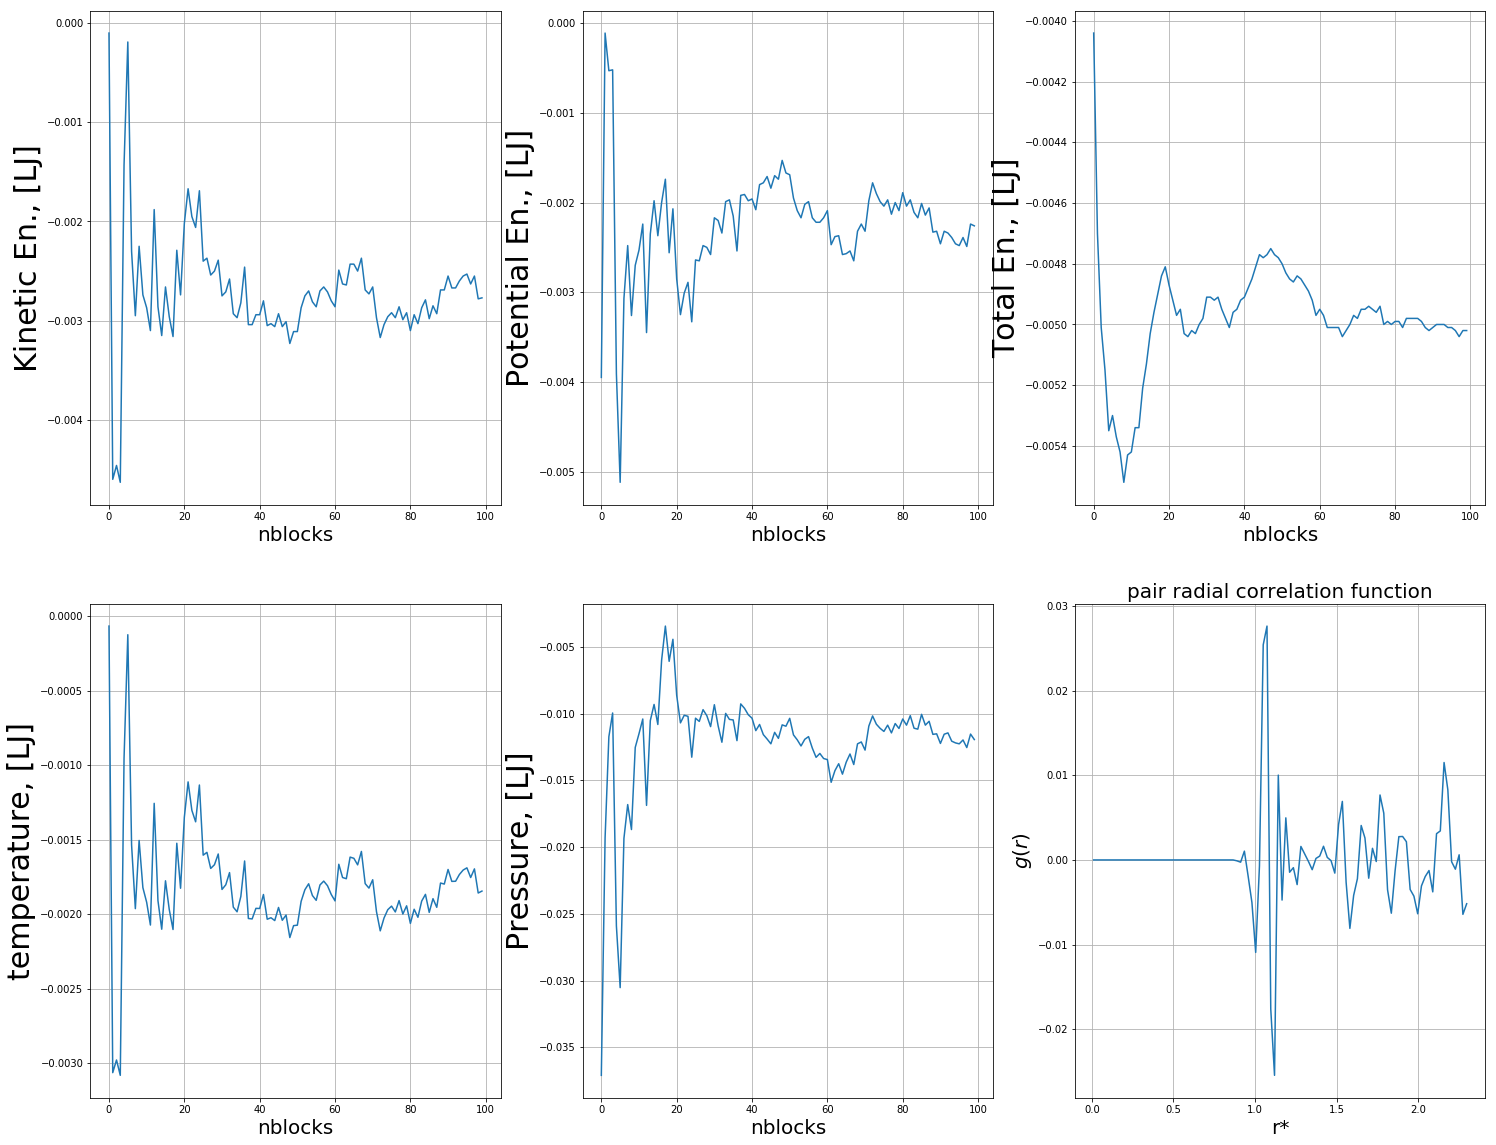

Liquid phase
-------------------------------------------------------------


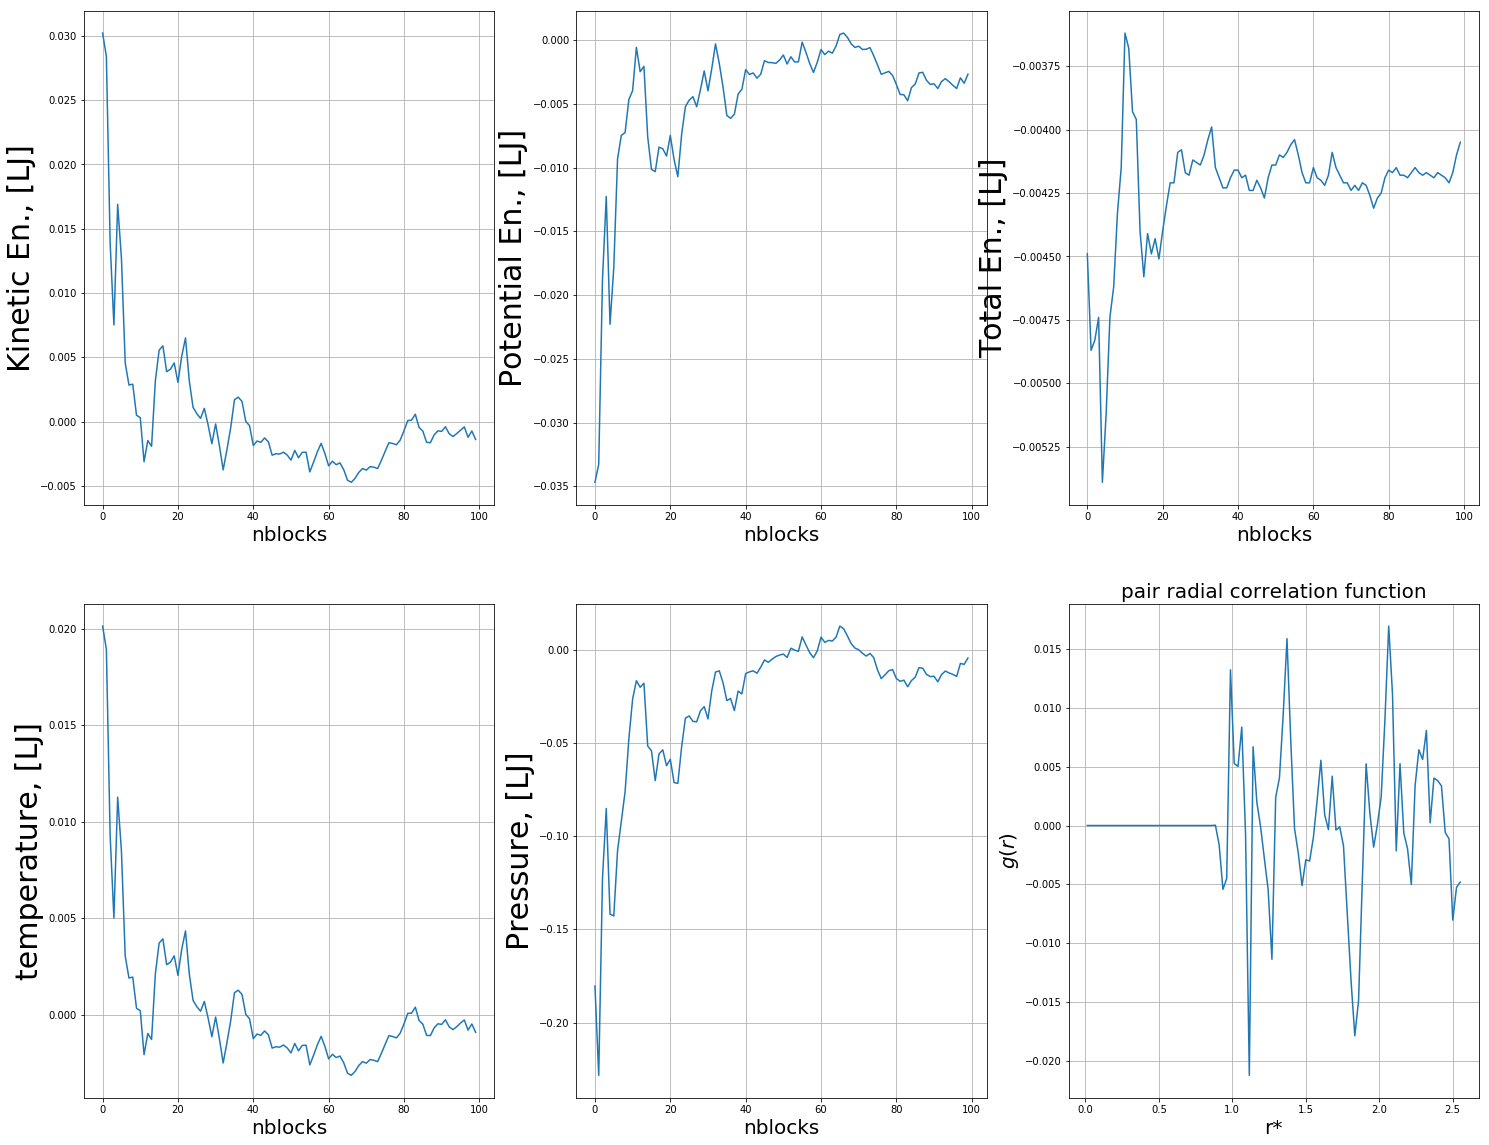

Gas phase
-------------------------------------------------------------


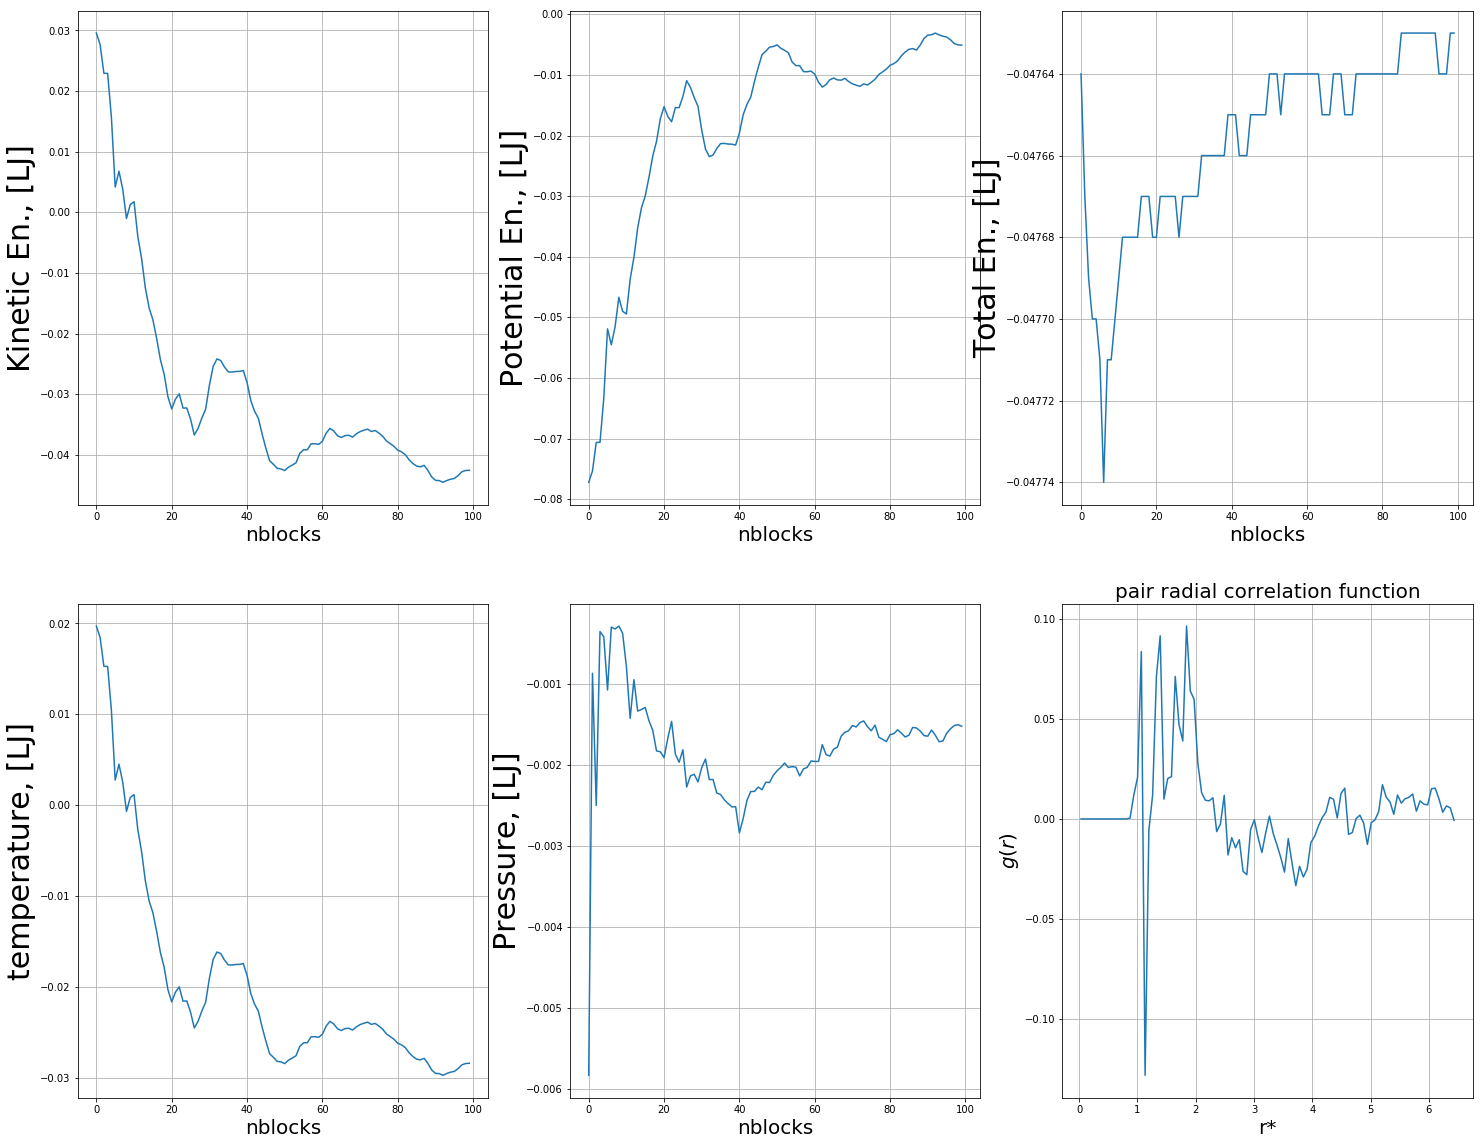

In [18]:
fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

print("Solid phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            y = np.loadtxt(double_codes[0]+phases[0]+"output.gave.out",usecols=(0),unpack='true')
            sum_prog0,err_prog0 = np.loadtxt(double_codes[0]+phases[0]+"output.gave.out",usecols=(1,2),unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(double_codes[1]+phases[0]+"output.gave.out",usecols=(1,2),unpack='true')    
            axs[i][j].plot(y,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
        else:
            sum_prog0,err_prog0 = np.loadtxt(double_codes[0]+phases[0]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(double_codes[1]+phases[0]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            axs[i][j].plot(x,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
        axs[i][j].grid(True)
        k=k+1
        
print("-------------------------------------------------------------")
plt.savefig("diff_solid_double_galileo.png")
plt.show()

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

######################## LIQUID PHASE ##########################################

print("Liquid phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            y = np.loadtxt(double_codes[0]+phases[1]+"output.gave.out",usecols=(0),unpack='true')
            sum_prog0,err_prog0 = np.loadtxt(double_codes[0]+phases[1]+"output.gave.out",usecols=(1,2),unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(double_codes[1]+phases[1]+"output.gave.out",usecols=(1,2),unpack='true')    
            axs[i][j].plot(y,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
        else:
            sum_prog0,err_prog0 = np.loadtxt(double_codes[0]+phases[1]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(double_codes[1]+phases[1]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            axs[i][j].plot(x,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
        axs[i][j].grid(True)
        k=k+1
        
print("-------------------------------------------------------------")
plt.savefig("diff_liquid_double_galileo.png")
plt.show()

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

###################################### GAS PHASE ###################################

print("Gas phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            y = np.loadtxt(double_codes[0]+phases[2]+"output.gave.out",usecols=(0),unpack='true')
            sum_prog0,err_prog0 = np.loadtxt(double_codes[0]+phases[2]+"output.gave.out",usecols=(1,2),unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(double_codes[1]+phases[2]+"output.gave.out",usecols=(1,2),unpack='true')    
            axs[i][j].plot(y,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
        else:
            sum_prog0,err_prog0 = np.loadtxt(double_codes[0]+phases[2]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(double_codes[1]+phases[2]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            axs[i][j].plot(x,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
        axs[i][j].grid(True)
        k=k+1
        
print("-------------------------------------------------------------")

plt.savefig("diff_gas_double_galileo.png")
plt.show()

In [19]:
print("all these results are perfectly acceptable")

all these results are perfectly acceptable


let's now see the performance on this code
simulation of 10'000 steps for solid phase starting from a fcc lattice configure
-------------------------------------------------------------


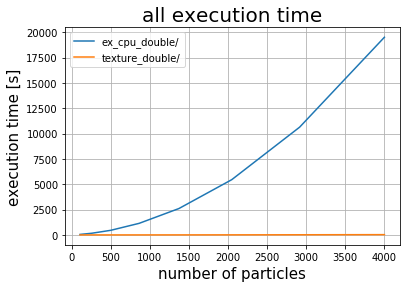

-------------------------------------------------------------


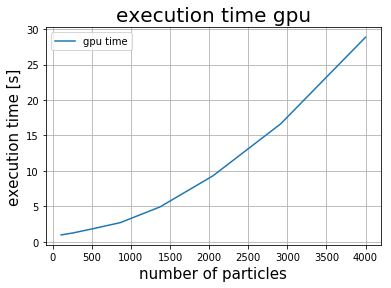

execution time for cpu in seconds: [   50.72   163.22   454.7   1144.17  2603.94  5455.27 10639.1  19515.4 ]
################################################
execution time for gpu portable_gpu/  in sec: [ 0.970304  1.24299   1.80973   2.70465   4.92134   9.30151  16.653
 28.8648  ]
speedup for  portable_gpu/  :  [ 52.27227755 131.31239994 251.25294933 423.03810105 529.11198982
 586.49294577 638.8698733  676.09683767]
################################################


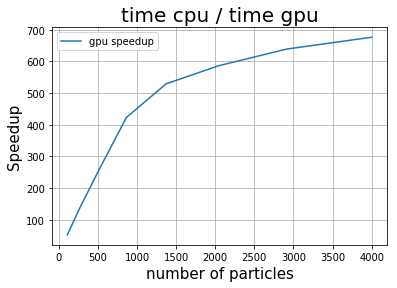

In [20]:
print("let's now see the performance on this code")

simulationtime = ["../simulation_cpudouble.time","texture_double/simulation.time"]

print("simulation of 10'000 steps for solid phase starting from a fcc lattice configure")

for j in range(2):
        x,time = np.loadtxt(simulationtime[j],usecols=(0,1),unpack='true')
        time = time/1000 #in second
        plt.plot(x,time)
        plt.xlabel("number of particles",fontsize=15)
        plt.ylabel("execution time [s]",fontsize=15)
        plt.legend(double_codes)
        plt.title("all execution time",fontsize=20)
        plt.grid(True)
        
print("-------------------------------------------------------------")

plt.savefig("ex_time_double_galileo.png")
plt.show()

x,time = np.loadtxt(simulationtime[1],usecols=(0,1),unpack='true')
time = time/1000 #in second
plt.plot(x,time)
plt.xlabel("number of particles",fontsize=15)
plt.ylabel("execution time [s]",fontsize=15)
plt.legend(["gpu time"])
plt.title("execution time gpu",fontsize=20)
plt.grid(True)
        
print("-------------------------------------------------------------")

plt.savefig("gpu_ex_time_double_galileo.png")
plt.show()
    
x,time0 = np.loadtxt(simulationtime[0],usecols=(0,1),unpack='true')
time0 = time0/1000

print("execution time for cpu in seconds:",time0)

x,time = np.loadtxt(simulationtime[1],usecols=(0,1),unpack='true')
time = time/1000 #in second
print("################################################")
print("execution time for gpu", codes[j], " in sec:",time)
speedup = time0/time
print("speedup for ",codes[j]," : ",speedup)
print("################################################")
plt.plot(x,speedup)
plt.xlabel("number of particles",fontsize=15)
plt.ylabel("Speedup",fontsize=15)
plt.title("time cpu / time gpu",fontsize=20)
plt.legend(["gpu speedup"])
plt.grid(True)

plt.savefig("speedup_double_galileo.png")
plt.show()